# Step 3: choose & load image

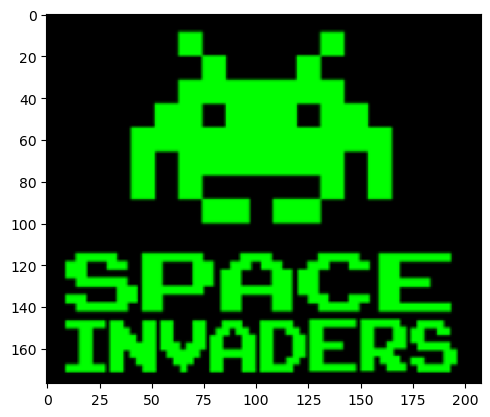

In [1]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

loc_input_img = PIL.Image.open(os.path.join('..', 'data', 'input', 'image_raw.png'))
img = np.array(loc_input_img)
plt.imshow(img)
plt.show()

# Step 4: Image manipulations

Manipulation 1: create image multiplication

In [2]:
# For better performance: Make/reserve array with shape of end result, based on shape of starting image
rows, columns, colour = np.shape(img)
img_tile = np.zeros([rows*3, columns*8, colour])

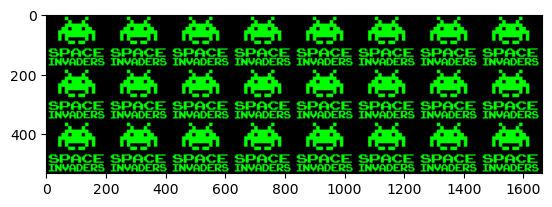

In [3]:
img_tile = np.tile(img, (3, 8, 1))
plt.imshow(img_tile)

# Save end result
Image.fromarray(img_tile).save(os.path.join('..', 'data', 'output', 'image_manipulation1.png'))

Manipulation 1: flip images

In [4]:
# Make array with shape of end result
rows, columns, colour = np.shape(img)
img_flip = np.zeros([rows*4, columns*6, colour])

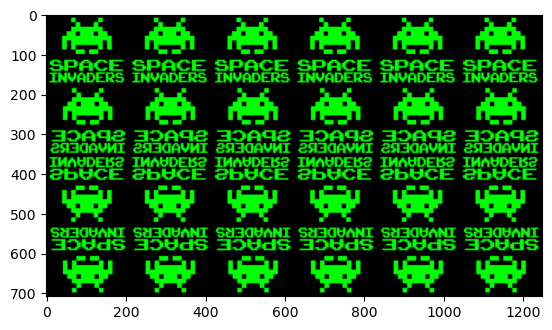

In [5]:
# Flip original image in three ways
img_mirror = np.fliplr(img)
img_upside = np.flipud(img)
img_mirrorup = np.flipud(img_mirror)

# Stack 4 images and concatenate vertically
img_flip = np.concatenate([img, img_mirror, img_upside, img_mirrorup], axis=0)
img_flip = np.tile(img_flip, (1, 6, 1))
plt.imshow(img_flip)

# Save end result
Image.fromarray(img_tile).save(os.path.join('..', 'data', 'output', 'image_manipulation2.png'))

Manipulation 3: colourful tiles

In [6]:
# make array with shape of end result
rows, columns, colour = np.shape(img)
img_full = np.zeros([rows*4, columns*4, colour])

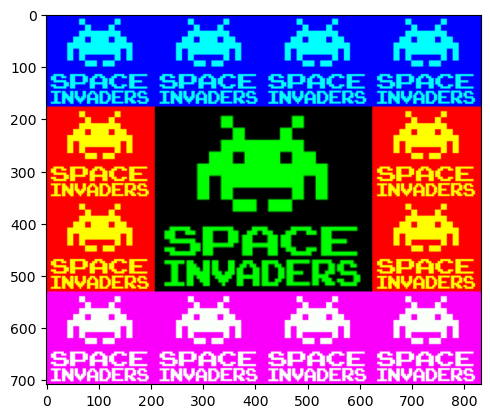

In [7]:
# Colour & tile images. Resulting colour can depend on colours of uploaded image
img_blue = img.copy()
img_blue[:,:,[2,3]] = 255
img_blue = np.tile(img_blue, (1, 4, 1))

img_yellow = img.copy()
img_yellow[:,:,[0,3]] = 255
img_yellow = np.tile(img_yellow, (2, 1, 1))

img_pink = img.copy()
img_pink[:,:,[0,2]] = 250 
img_pink = np.tile(img_pink, (1, 4, 1))

# Enlarge original image
img_large = img.copy()
img_large = img_large.repeat(2, axis=0).repeat(2, axis=1)

# Wrap in one array
img_full = np.concatenate([img_yellow, img_large, img_yellow], axis=1)
img_full = np.concatenate([img_blue, img_full, img_pink], axis=0)
plt.imshow(img_full)

Image.fromarray(img_full).save(os.path.join('..', 'data', 'output', 'image_manipulation3.png'))